In [ ]:
# Installing Necessary Libraries and Requirements
import pandas as pd
import matplotlib.pyplot as plt


# Loading and Exploring the Dataset

In [ ]:
data = pd.read_csv('Data(2).csv')


In [ ]:
data.head()

,Status,Fulfilment,Delivery,Size,State,Promotion,Category,Month,Amount
0,Cancelled,Merchant,Standard,S,MAHARASHTRA,None,Jacket,April,647.62
1,Shipped,Merchant,Standard,3XL,KARNATAKA,Free-Financing,Denim,April,406.00
2,Shipped,Amazon,Expedited,XL,MAHARASHTRA,Free Shipping,Denim,April,329.00
3,Cancelled,Merchant,Standard,L,PUDUCHERRY,None,Fleece,April,753.33
4,Shipped,Amazon,Expedited,3XL,TAMIL NADU,None,Shoes,April,574.00


In [ ]:
data.tail()

,Status,Fulfilment,Delivery,Size,State,Promotion,Category,Month,Amount
124979,Shipped,Amazon,Expedited,XL,TELANGANA,None,Denim,May,517.0
124980,Shipped,Amazon,Expedited,M,HARYANA,Free Shipping,Jacket,May,999.0
124981,Shipped,Amazon,Expedited,XXL,TELANGANA,None,Fleece,May,690.0
124982,Shipped,Amazon,Expedited,XS,Gujarat,Free Shipping,Jacket,May,1079.6
124983,Shipped,Amazon,Expedited,S,CHHATTISGARH,Free Shipping,Jacket,May,696.0


## 1. Amount Spend On Items Sold: BoxPlot Visualization

<Figure size 1000x600 with 0 Axes>

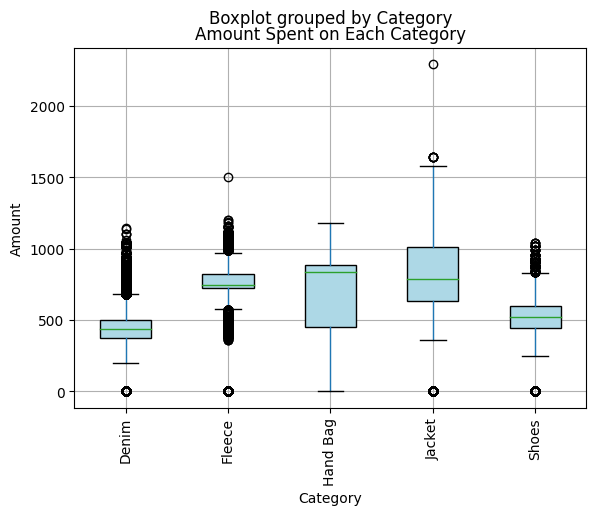

In [ ]:
# Create a box plot to show the amount spent on each item sold
plt.figure(figsize=(10, 6))
data.boxplot(column='Amount', by='Category', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Amount Spent on Each Category')
plt.xticks(rotation=90)
plt.show()

# Model Building

## Data Preparation
-   First Off All; The Data Has Categorical Variables. <br>
-   One-Hot Encoding was Done to Convert the Categorical Column Variables into Suitable Values That Could work with Model Building libraries such as `sklearn`
-   Next, the Encoded data Is split Into Target Variable `Status_cancelled` and Input Features.

In [ ]:
#Requirements
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
# Specify the categorical columns that need to be one-hot encoded
categorical_columns = ['Status', 'Fulfilment', 'Delivery',
                       'Size', 'State', 'Promotion',
                       'Category', 'Month']

# Perform one-hot encoding on the categorical columns
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display the encoded data
print(encoded_data.head())
print(encoded_data.tail())

   Amount  Status_Cancelled  Status_Shipped  Fulfilment_Amazon  \
0  647.62                 1               0                  0   
1  406.00                 0               1                  0   
2  329.00                 0               1                  1   
3  753.33                 1               0                  0   
4  574.00                 0               1                  1   

   Fulfilment_Merchant  Delivery_Expedited  Delivery_Standard  Size_3XL  \
0                    1                   0                  1         0   
1                    1                   0                  1         1   
2                    0                   1                  0         0   
3                    1                   0                  1         0   
4                    0                   1                  0         1   

   Size_4XL  Size_5XL  ...  Promotion_None  Category_Denim  Category_Fleece  \
0         0         0  ...               1               0               

In [ ]:
# split Into Target Variable Status_cancelled and Input Features.
X = encoded_data.drop('Status_Cancelled', axis=1)
y = encoded_data['Status_Cancelled']

# Training and Testing Split
The Data Is Split Into a Training (25%) and Testing (75%) Set

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## The Random Forest Model
*   We Use SimpleImputer to Replace All Missing Values with a Mean

In [ ]:
## Using Imputer to Take Care of missing Values..
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and testing data using the fitted imputer
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Decision Tree Model Instance Creation, Building and Fitting
# Creating a Confusion Matrix
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_imputed, y_train)
dt_predictions = dt_model.predict(X_test_imputed)
dt_cm = confusion_matrix(y_test, dt_predictions)


In [ ]:
# Resimulate Fitting Model On Training Data
dt_model.fit(X_train_imputed, y_train)


DecisionTreeClassifier(random_state=42)

## Random Forest Model
-   We Create and Train the Random Forest Model Using the Same Imputed Data as the Decision Tree

In [ ]:
# Instanciating
rf_model = RandomForestClassifier(random_state=42)
# Fitting the model data
rf_model.fit(X_train_imputed, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Predicting on the test Data
rf_predictions = rf_model.predict(X_test_imputed)


In [ ]:
# Creating a Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)


## Accuracy Scores Calculations
We Calculate the Accuracy Scores for Both Models Above

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Results Displayed
-  The Results of Both Models are As Displayed Below...

In [ ]:
print("Decision Tree Confusion Matrix:")
print(dt_cm)
print("Decision Tree Accuracy Score:", dt_accuracy)
print()
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("Random Forest Accuracy Score:", rf_accuracy)


Decision Tree Confusion Matrix:
[[26359     0]
 [    0  4887]]
Decision Tree Accuracy Score: 1.0

Random Forest Confusion Matrix:
[[26359     0]
 [    0  4887]]
Random Forest Accuracy Score: 1.0
